In [0]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [0]:
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
print (boston_df.info())
# add another column that contains the house prices which in scikit learn datasets are considered as target
boston_df['Price']=boston.target
print (boston_df.head(3))
newX=boston_df.drop('Price',axis=1)
print (newX[0:3]) # check 
newY=boston_df['Price']
print (type(newY))# pandas core frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB
None
      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  Price
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  

In [0]:
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)
print (len(X_test), len(y_test))
lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

152 152


linear regression train score: 0.7419034960343789
linear regression test score: 0.7147895265576851
ridge regression train score low alpha: 0.7419030253527293
ridge regression test score low alpha: 0.7146125373123909
ridge regression train score high alpha: 0.7172809669938278
ridge regression test score high alpha: 0.6805765856921935


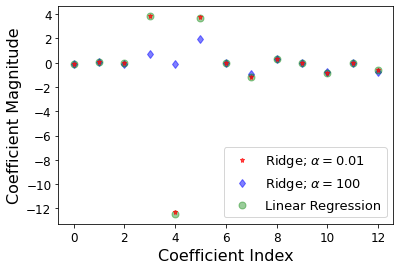

In [0]:
print ("linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',
         label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',
         label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()